# Title- Titanic: Machine Learning from Disaster

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Practice Skills
###### Binary classification 
---

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

----
### Data Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>
---
### Variable Notes
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>


---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import (load_data, print_dataset_info, split_dataset, 
                              auto_scatter_simple,load_dataset,DataFrameSelector)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

pd.set_option('display.width', 120)
pd.set_option('precision', 4)

sns.set_style("whitegrid")

In [2]:
load_app_config()
DIRECTORY="kaggle_titanic"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'Survived'
input_path = get_datafolder_path()

train_file = os.path.join(input_path, DIRECTORY, TRAIN_FILE)
test_file = os.path.join(input_path, DIRECTORY, TEST_FILE)
print(train_file)
print(test_file)

train_dataset,feature_columns,response_column,continuous_vars,categorical_vars = load_dataset(train_file,RESPONSE)
test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars  = load_dataset(test_file,RESPONSE,colseparator=',')

train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]
test_X  = test_dataset[tfeature_columns]

Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path
F:\DataSource\kaggle_titanic\train.csv
F:\DataSource\kaggle_titanic\test.csv
 input file is :F:\DataSource\kaggle_titanic\train.csv loaded.
Continous Variables
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
 input file is :F:\DataSource\kaggle_titanic\test.csv loaded.
Continous Variables
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### 2.Summarize Data 
#### a) Descriptive statistics
#### b) Data visualizations

In [3]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*50,"info"))
    print(input_dataset.info())
    print("<{0} {1} {0}>".format("="*50,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*50,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*45,"Descriptive Statistics-X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*45,"Descriptive Statistics-y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*50,"value_count-y"))
 
    print(y.groupby(response_column)[response_column].count())

display_data_descriptives(train_dataset,train_X,feature_columns,train_y,response_column)

check_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*50,"null value count"))
print(check_null)
train_dataset.head() 

sns.set_palette(sns.color_palette("muted", 12))

<================================================== info ==================================================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<================================================== feature columns ==================================================>
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<================================================== response ===============

In [4]:
full_dataset =pd.concat(objs=[train_dataset, test_dataset], axis=0).reset_index(drop=True)  

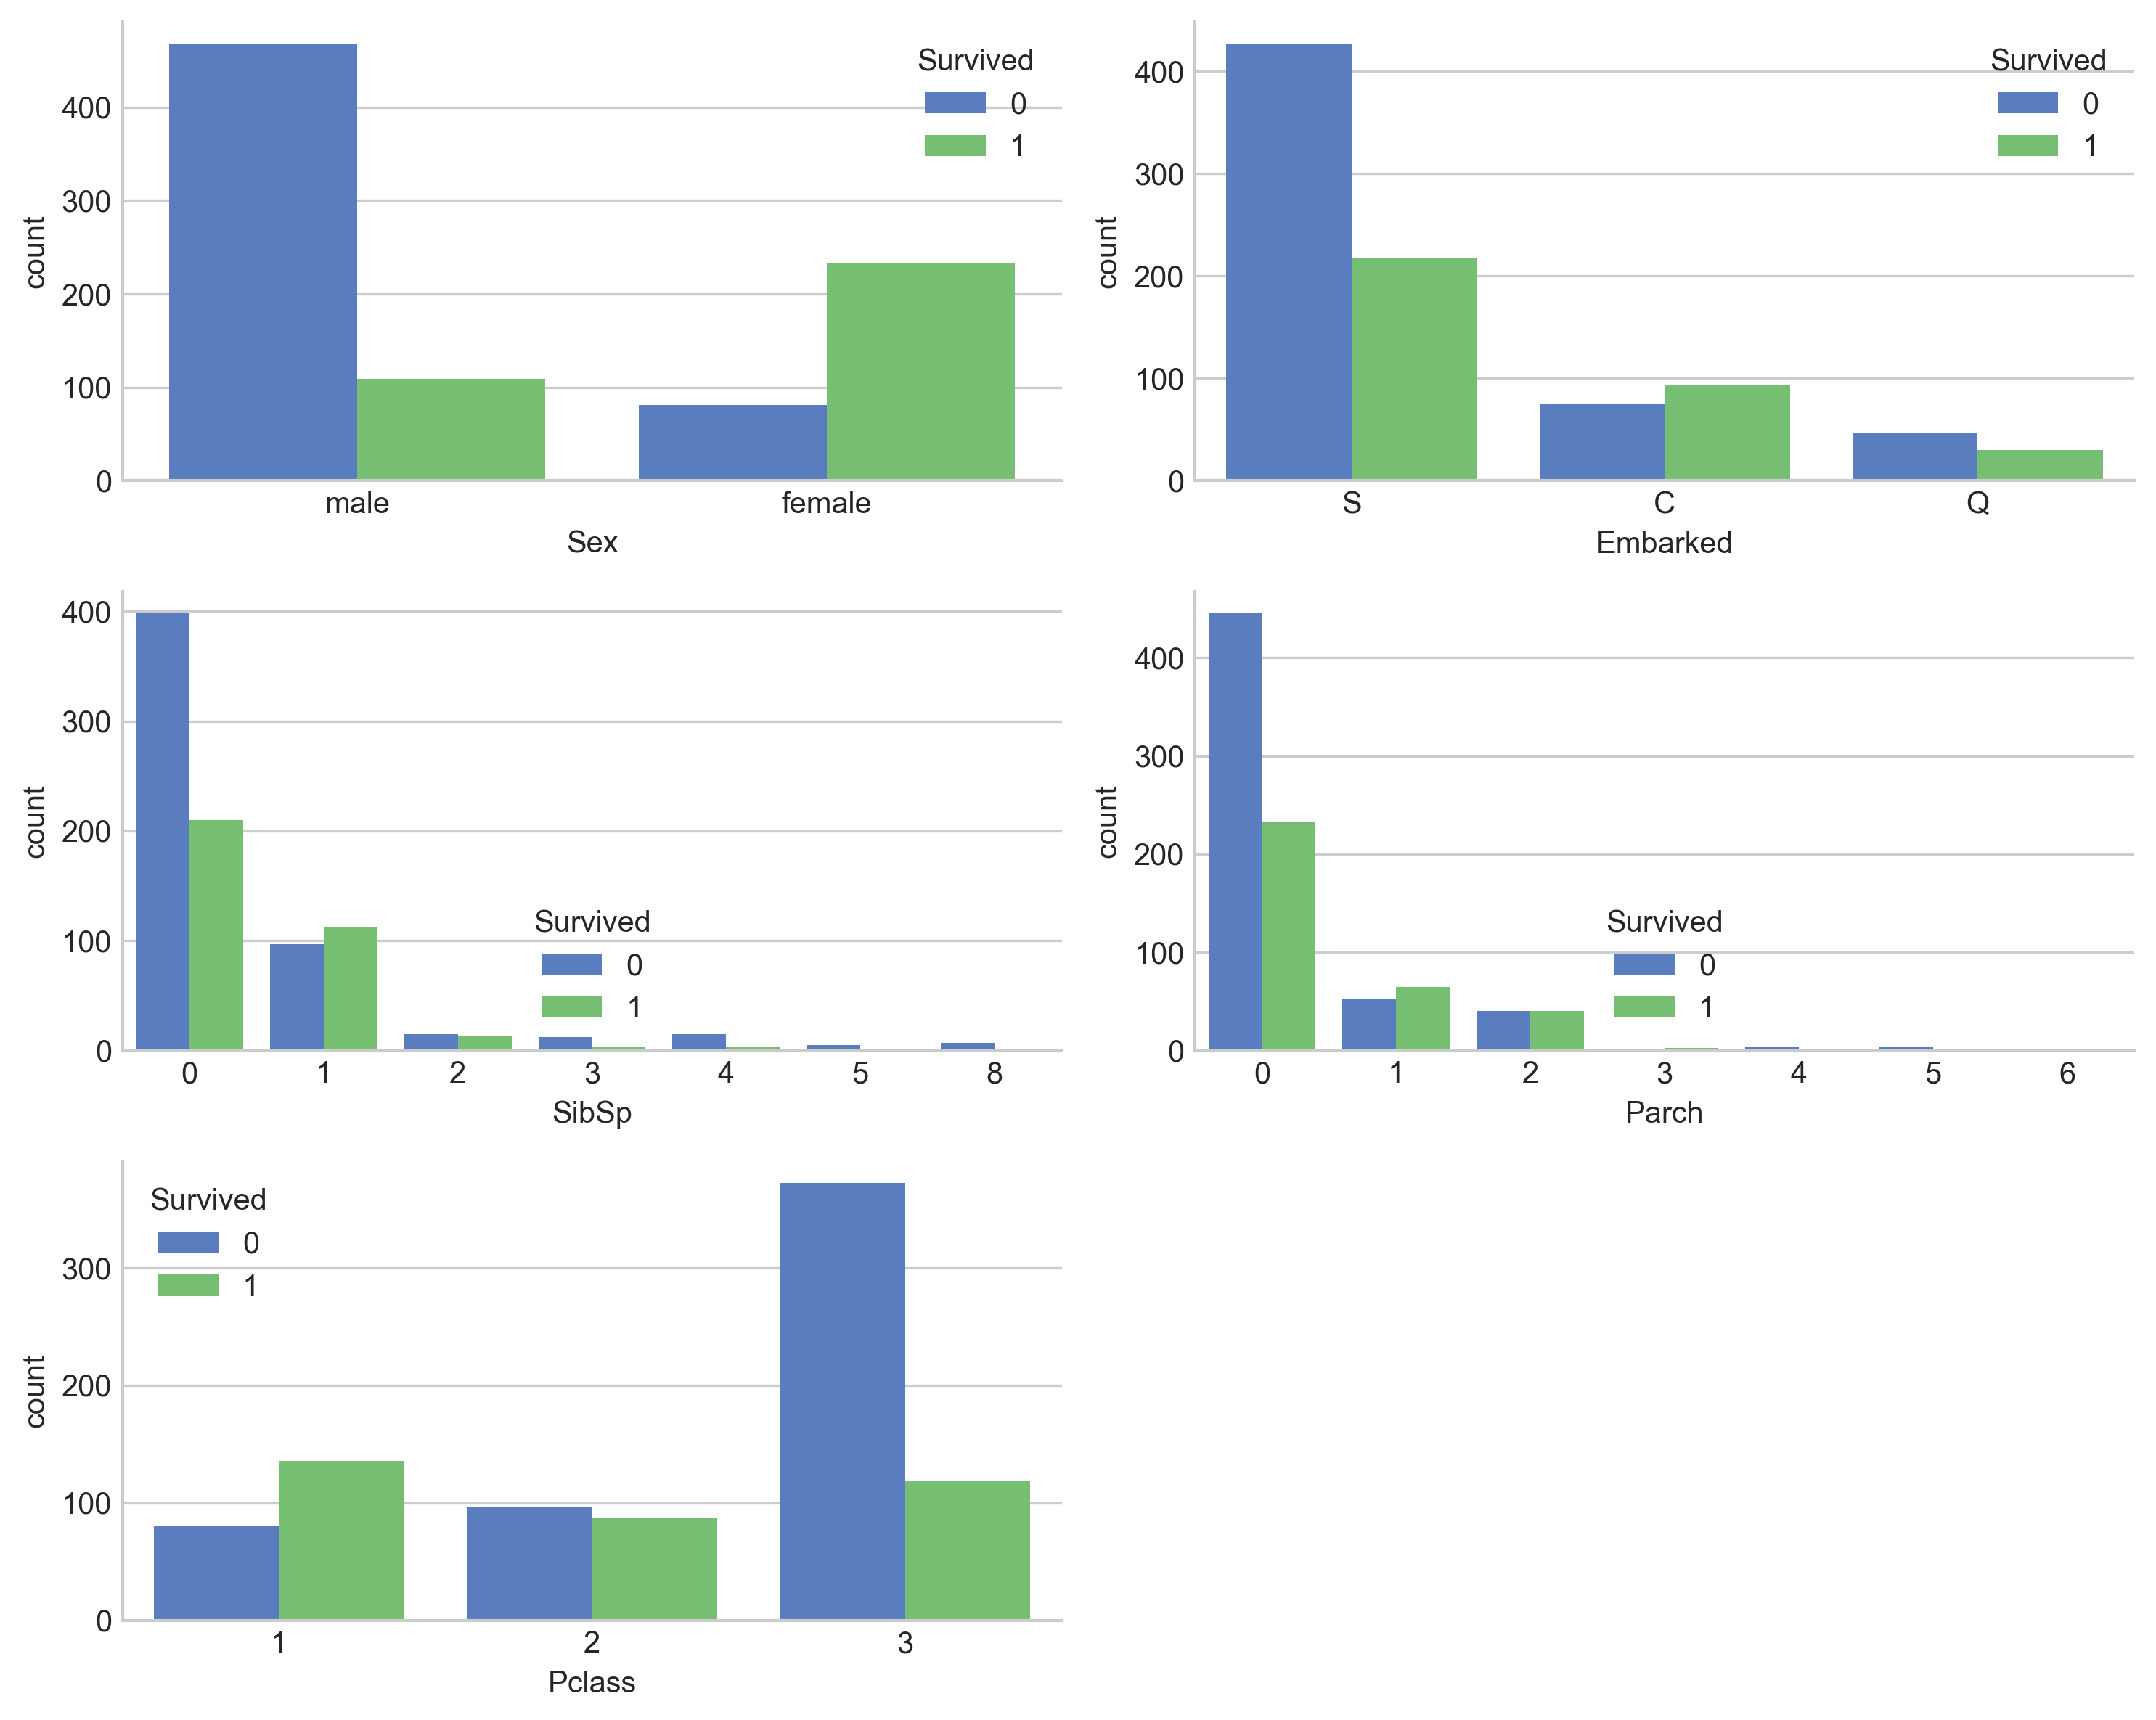

In [5]:
categorical = ['Sex', 'Embarked','SibSp','Parch','Pclass']

def count_plots(train_dataset,categorical):
    fig = plt.figure(figsize=(10,8),dpi=300)
    size =len(categorical)
     
    for i in range(size):
        ax = fig.add_subplot(3, 2, i+1)
        sns.countplot(x=categorical[i], hue="Survived", data=train_dataset,ax=ax,palette="muted")
        sns.despine()
         
    plt.tight_layout()
    plt.show()
count_plots(train_dataset,categorical)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


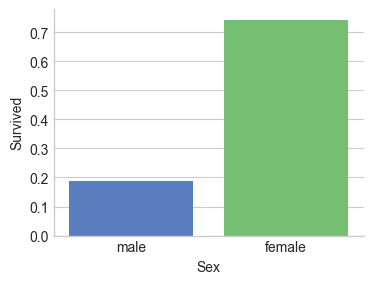

In [6]:
print(train_dataset.columns.values)
fig = plt.figure(figsize=(4,3),dpi=100)
ax=fig.gca()
sns.barplot( y="Survived",x="Sex", data=train_dataset,ci=None,ax=ax)
sns.despine()

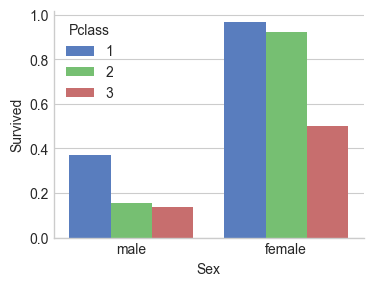

In [7]:
fig = plt.figure(figsize=(4,3),dpi=100)
ax=fig.gca()
sns.barplot( y="Survived",x="Sex",hue="Pclass", data=train_dataset,ci=None,ax=ax)
sns.despine()


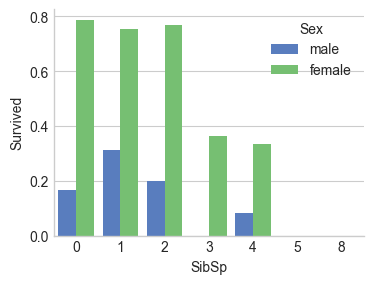

In [8]:
fig = plt.figure(figsize=(4,3),dpi=100)
ax=fig.gca()
sns.barplot(x="SibSp", y="Survived",hue="Sex", data=train_dataset,ci=None,ax=ax)
sns.despine()

Males having more than 2 children did not survive


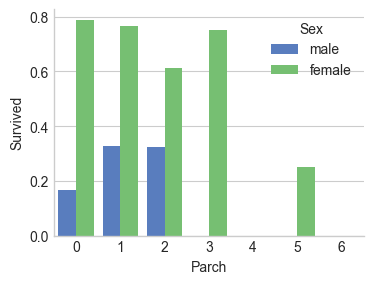

In [9]:
fig = plt.figure(figsize=(4,3),dpi=100)
ax=fig.gca()
sns.barplot(x="Parch", y="Survived",hue="Sex", data=train_dataset,ci=None,ax=ax)
sns.despine()
print("Males having more than 2 children did not survive")

---  
### 3. Prepare Data
#### a) Data Cleaning
#### b) Feature Selection
#### c) Data Transforms

In [10]:
check_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*50,"null value count"))
print(check_null)
 

<================================================== null value count ==================================================>
Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64


##### Fill Embarked NA with S

In [11]:
full_dataset['Embarked'].fillna('S',inplace=True)
train_dataset['Embarked'].fillna('S',inplace=True)

##### Extract Deck level from Cabin and  fill na with XXX


In [12]:
full_dataset['Cabin'].fillna('XXX' ,inplace=True)
full_dataset['Deck_level'] =full_dataset['Cabin'].apply(lambda x : x[0]) 

train_dataset['Cabin'].fillna('XXX' ,inplace=True)
train_dataset['Deck_level'] = train_dataset['Cabin'].apply(lambda x : x[0]) 
 

No males survived in deck G


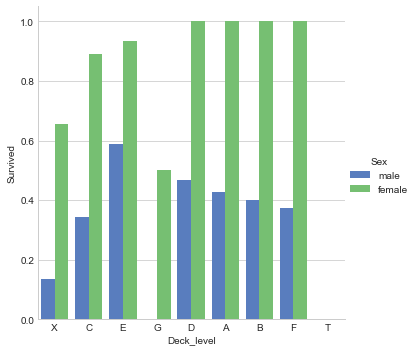

In [13]:
sns.factorplot(x="Deck_level", y="Survived",hue="Sex", kind ='bar', data=train_dataset,ci=None,legend_out=True,size =5)
sns.despine()
print( "No males survived in deck G")

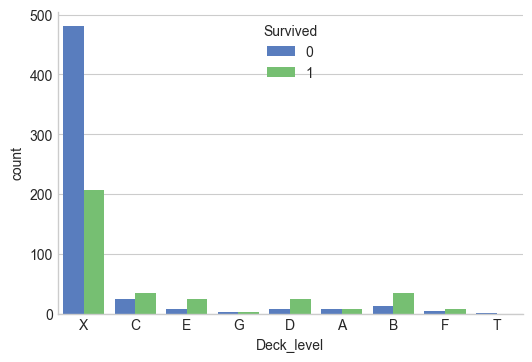

In [14]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.gca()
sns.countplot(x='Deck_level', hue="Survived", data=train_dataset,ax=ax)
sns.despine()
plt.show()

----
##### Create new features -Title,namelength
----

In [15]:
train_dataset['Title'] =train_dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand =False)
full_dataset['Title'] = full_dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand =False)
print(full_dataset['Title'].unique())
train_dataset['Title'].unique() 

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [16]:
for dataset in [train_dataset,full_dataset]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Sir', 'Jonkheer', 'Dona','Don'], 'Other')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'],'Officer')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


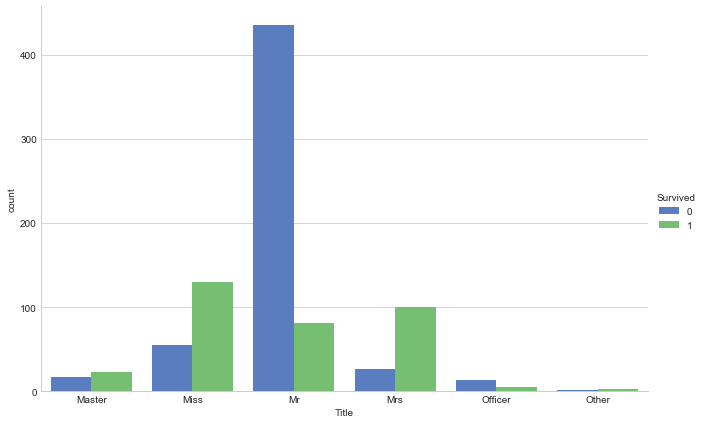

In [17]:
sns.factorplot(x='Title', hue= 'Survived' ,data=train_dataset, kind='count', aspect=1.5, size=6,
               order=sorted(train_dataset['Title'].unique()),ci=None)

In [18]:
train_dataset['Name_length'] = train_dataset['Name'].apply(lambda x : len(x)) 
full_dataset['Name_length']  = full_dataset['Name'].apply(lambda x : len(x)) 


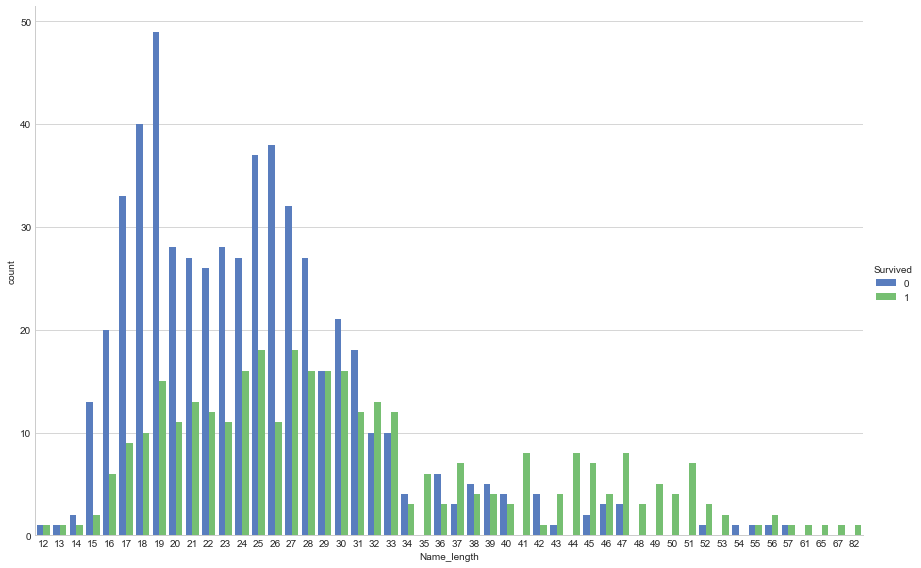

In [19]:
sns.factorplot(x='Name_length', hue= 'Survived' ,data=train_dataset, kind='count', aspect=1.5, size=8,
                   order=sorted(train_dataset['Name_length'].unique()) )

Male passengers name length >49 did not survive


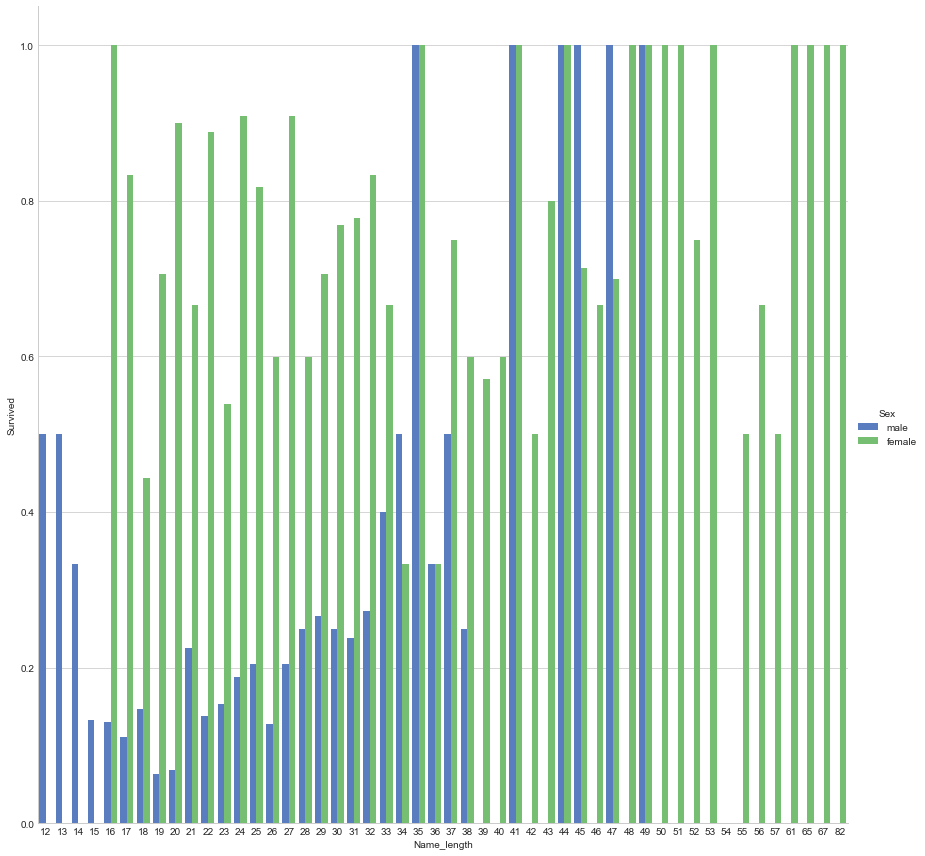

In [20]:
sns.factorplot(x="Name_length", y="Survived",hue="Sex", kind ='bar', data=train_dataset,
               ci=None,legend_out=True,size =12,aspect=1)
sns.despine()
print("Male passengers name length >49 did not survive")

In [21]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck_level,Title,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,XXX,S,X,Mr,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,XXX,S,X,Miss,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,XXX,S,X,Mr,24


----
##### Create new feature - family
----

In [22]:
train_dataset['Family_size'] = train_dataset['SibSp'] + train_dataset['Parch'] +1
train_dataset['Single'] = train_dataset['Family_size'].map(lambda s: 1 if s == 1 else 0)
train_dataset['SmallF'] = train_dataset['Family_size'].map(lambda s: 1 if  s == 2  else 0)
train_dataset['MedF']  = train_dataset['Family_size'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train_dataset['LargeF'] = train_dataset['Family_size'].map(lambda s: 1 if s >= 5 else 0)

full_dataset['Family_size'] = full_dataset['SibSp'] + full_dataset['Parch']
full_dataset['Single'] = full_dataset['Family_size'].map(lambda s: 1 if s == 1 else 0)
full_dataset['SmallF'] = full_dataset['Family_size'].map(lambda s: 1 if  s == 2  else 0)
full_dataset['MedF']  = full_dataset['Family_size'].map(lambda s: 1 if 3 <= s <= 4 else 0)
full_dataset['LargeF'] = full_dataset['Family_size'].map(lambda s: 1 if s >= 5 else 0)

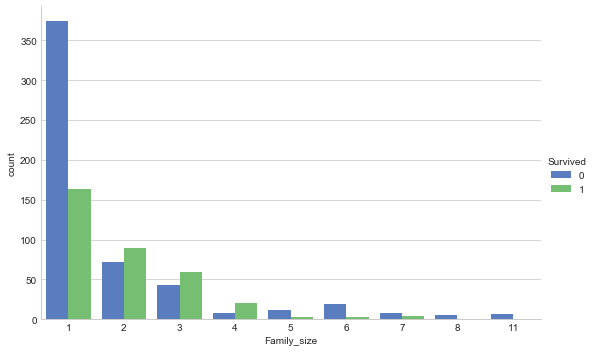

In [23]:
sns.factorplot(x='Family_size', hue= 'Survived' ,data=train_dataset, kind='count', aspect=1.5, size=5,
                   order=sorted(train_dataset['Family_size'].unique()) )

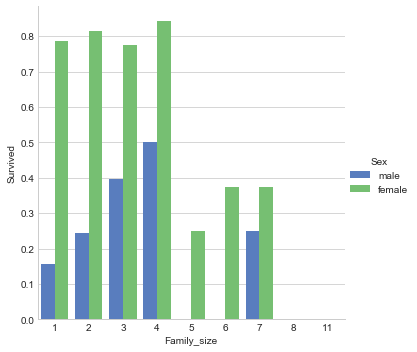

In [24]:
sns.factorplot(x="Family_size", y="Survived",hue="Sex", kind ='bar', data=train_dataset,
               ci=None,legend_out=True,size =5,aspect=1)
sns.despine()

In [25]:
full_dataset_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0]
print(full_dataset_null)

train_dataset_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0]
train_dataset_null

Age         263
Fare          1
Survived    418
dtype: int64


Age    177
dtype: int64

In [26]:
print(full_dataset[full_dataset['Fare'].isnull()])
print(train_dataset[train_dataset['Fare'].isnull()])

       Age Cabin Embarked  Fare                Name  Parch  PassengerId  Pclass   Sex  SibSp  Survived Ticket  \
1043  60.5   XXX        S   NaN  Storey, Mr. Thomas      0         1044       3  male      0       NaN   3701   

     Deck_level Title  Name_length  Family_size  Single  SmallF  MedF  LargeF  
1043          X    Mr           18            0       0       0     0       0  
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Deck_level, Title, Name_length, Family_size, Single, SmallF, MedF, LargeF]
Index: []


In [27]:
fare_median =train_dataset[(train_dataset['Pclass'] ==3  ) & 
                  (train_dataset['Sex'] == 'male'  ) &
                  (train_dataset['Age'] >= 50  )
               ]['Fare'].median()

print(fare_median)
full_dataset.loc[full_dataset['Fare'].isnull(),'Fare']= fare_median
train_dataset.loc[train_dataset['Fare'].isnull(),'Fare']= fare_median

7.75


In [28]:
median_ages =full_dataset.groupby(['Sex','Pclass','Title'])['Age'].median()
 
print(median_ages)

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Other      39.0
        2       Miss       20.0
                Mrs        30.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Other      40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64


In [29]:
def fill_missing_age(row):
    if pd.isnull(row['Age']):
        return median_ages[row['Sex'],row['Pclass'],row['Title']]
    else:
        return row['Age']
        
    
full_dataset['Age']=full_dataset.apply(fill_missing_age,axis=1)   
train_dataset['Age']=train_dataset.apply(fill_missing_age,axis=1)   

In [30]:
full_dataset_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0]
print(full_dataset_null)
full_dataset[full_dataset['Age'].isnull()]

Survived    418
dtype: int64


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck_level,Title,Name_length,Family_size,Single,SmallF,MedF,LargeF


In [31]:
def child_or_adult(passenger):
    age, sex = passenger
    
    if age <=12:
        return 'child'
    
    elif (age >= 12 and age < 21) :  
        return 'teenager'
    
    elif (age >= 21 and age < 30) and (sex =='male'):  
        return 'young_male'
    
    elif (age >= 21 and age < 30) and (sex =='female'):  
        return 'young_female'

    elif (age >= 21 and age < 50) and (sex =='male') :
        return 'adult_male'
    elif (age >= 21 and age < 50) and (sex =='female') :
        return 'adult_female'
    
    elif (age >= 50 ) and (sex =='male') :
        return 'old_male'
    elif (age >= 50 ) and (sex =='female') :
        return 'old_female'
    
full_dataset['PersonStatus'] = full_dataset[['Age', 'Sex']].apply(child_or_adult, axis=1)
train_dataset['PersonStatus'] = train_dataset[['Age', 'Sex']].apply(child_or_adult, axis=1)
full_dataset[full_dataset['PersonStatus'].isnull()].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Deck_level,Title,Name_length,Family_size,Single,SmallF,MedF,LargeF,PersonStatus


In [32]:
from sklearn import feature_extraction
def one_hot_dataframe(data,columns,replace=False):
    fe_vec= feature_extraction.DictVectorizer()
    make_dict = lambda row :dict((column,row[column]) for column in  columns)
    vector_data=pd.DataFrame(fe_vec.fit_transform( data[columns].apply(make_dict, axis=1)).toarray())
    vector_data.columns = fe_vec.get_feature_names()
    vector_data.index= data.index
    if replace:
        data = data.drop(columns, axis=1)
        data = data.join(vector_data)
    return data,vector_data

full_dataset,full_dataset_ignore = one_hot_dataframe(full_dataset, ['PersonStatus','Pclass','Embarked','Title','Deck_level'], replace=True)
full_dataset.info()
full_dataset.head()
 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 43 columns):
Age                          1309 non-null float64
Cabin                        1309 non-null object
Fare                         1309 non-null float64
Name                         1309 non-null object
Parch                        1309 non-null int64
PassengerId                  1309 non-null int64
Sex                          1309 non-null object
SibSp                        1309 non-null int64
Survived                     891 non-null float64
Ticket                       1309 non-null object
Name_length                  1309 non-null int64
Family_size                  1309 non-null int64
Single                       1309 non-null int64
SmallF                       1309 non-null int64
MedF                         1309 non-null int64
LargeF                       1309 non-null int64
Deck_level=A                 1309 non-null float64
Deck_level=B                 1309 non-null float6

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,...,PersonStatus=old_male,PersonStatus=teenager,PersonStatus=young_female,PersonStatus=young_male,Title=Master,Title=Miss,Title=Mr,Title=Mrs,Title=Officer,Title=Other
0,22.0,XXX,7.2500,"Braund, Mr. Owen Harris",0,1,male,1,0.0,A/5 21171,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,female,1,1.0,PC 17599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,XXX,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,female,1,1.0,113803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,XXX,8.0500,"Allen, Mr. William Henry",0,5,male,0,0.0,373450,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
full_dataset['AgeBand'] = pd.cut(full_dataset[full_dataset['Age']>= 0]['Age']  ,5)


In [34]:
full_dataset['AgeBand']

0       (16.136, 32.102]
1       (32.102, 48.068]
2       (16.136, 32.102]
3       (32.102, 48.068]
4       (32.102, 48.068]
5       (16.136, 32.102]
6       (48.068, 64.034]
7       (0.0902, 16.136]
8       (16.136, 32.102]
9       (0.0902, 16.136]
10      (0.0902, 16.136]
11      (48.068, 64.034]
12      (16.136, 32.102]
13      (32.102, 48.068]
14      (0.0902, 16.136]
15      (48.068, 64.034]
16      (0.0902, 16.136]
17      (16.136, 32.102]
18      (16.136, 32.102]
19      (16.136, 32.102]
20      (32.102, 48.068]
21      (32.102, 48.068]
22      (0.0902, 16.136]
23      (16.136, 32.102]
24      (0.0902, 16.136]
25      (32.102, 48.068]
26      (16.136, 32.102]
27      (16.136, 32.102]
28      (16.136, 32.102]
29      (16.136, 32.102]
              ...       
1279    (16.136, 32.102]
1280    (0.0902, 16.136]
1281    (16.136, 32.102]
1282    (48.068, 64.034]
1283    (0.0902, 16.136]
1284    (32.102, 48.068]
1285    (16.136, 32.102]
1286    (16.136, 32.102]
1287    (16.136, 32.102]


In [35]:
#full_dataset['AgeBand']
full_dataset.loc[ (full_dataset['Age'] > 0 ) & (full_dataset['Age'] <= 16.136), 'Age'] = 0
full_dataset.loc[(full_dataset['Age'] > 16.136) & (full_dataset['Age'] <= 32.102), 'Age'] = 1
full_dataset.loc[(full_dataset['Age'] > 32.102)  & (full_dataset['Age'] <= 48.0685), 'Age'] = 2
full_dataset.loc[(full_dataset['Age'] > 48.068) & (full_dataset['Age'] <= 64.034), 'Age'] = 3
#full_dataset.loc[(full_dataset['Age'] > 53.39) & (full_dataset['Age'] <= 66.695), 'Age'] = 4
full_dataset.loc[ full_dataset['Age'] > 64.034, 'Age'] = 4


In [36]:
full_dataset['FareBand'] = pd.qcut(full_dataset['Fare'], 4)
full_dataset['FareBand']
#print (train_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())


0         (-0.001, 7.896]
1       (31.275, 512.329]
2         (7.896, 14.454]
3       (31.275, 512.329]
4         (7.896, 14.454]
5         (7.896, 14.454]
6       (31.275, 512.329]
7        (14.454, 31.275]
8         (7.896, 14.454]
9        (14.454, 31.275]
10       (14.454, 31.275]
11       (14.454, 31.275]
12        (7.896, 14.454]
13       (14.454, 31.275]
14        (-0.001, 7.896]
15       (14.454, 31.275]
16       (14.454, 31.275]
17        (7.896, 14.454]
18       (14.454, 31.275]
19        (-0.001, 7.896]
20       (14.454, 31.275]
21        (7.896, 14.454]
22        (7.896, 14.454]
23      (31.275, 512.329]
24       (14.454, 31.275]
25      (31.275, 512.329]
26        (-0.001, 7.896]
27      (31.275, 512.329]
28        (-0.001, 7.896]
29        (-0.001, 7.896]
              ...        
1279      (-0.001, 7.896]
1280     (14.454, 31.275]
1281    (31.275, 512.329]
1282    (31.275, 512.329]
1283     (14.454, 31.275]
1284      (7.896, 14.454]
1285     (14.454, 31.275]
1286    (31.

In [37]:
full_dataset.loc[ full_dataset['Fare'] <= 7.896, 'Fare'] = 0
full_dataset.loc[(full_dataset['Fare'] > 7.896) & (full_dataset['Fare'] <= 14.454), 'Fare'] = 1
full_dataset.loc[(full_dataset['Fare'] > 14.454) & (full_dataset['Fare'] <=31.275), 'Fare']   = 2
full_dataset.loc[ full_dataset['Fare'] > 31.275, 'Fare'] = 3
full_dataset['Fare'] = full_dataset['Fare'].astype(int)

In [38]:
Ticket = []
for each_ticket in list(full_dataset['Ticket']):
    #print(each_ticket)
    each_ticket =str(each_ticket).upper()
    if not each_ticket.isdigit() :
        each_ticket=each_ticket.replace(".","").replace("/","").strip().split(' ')[0] 
        Ticket.append(each_ticket) #Take prefix
    else:
        Ticket.append("XXX")
full_dataset["Ticket"] = Ticket

In [39]:
#full_dataset = pd.get_dummies(full_dataset, columns = ["Ticket"], prefix="T")

In [40]:
full_dataset_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0]
print(full_dataset_null)

full_dataset.info()


Survived    418
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 45 columns):
Age                          1309 non-null float64
Cabin                        1309 non-null object
Fare                         1309 non-null int32
Name                         1309 non-null object
Parch                        1309 non-null int64
PassengerId                  1309 non-null int64
Sex                          1309 non-null object
SibSp                        1309 non-null int64
Survived                     891 non-null float64
Ticket                       1309 non-null object
Name_length                  1309 non-null int64
Family_size                  1309 non-null int64
Single                       1309 non-null int64
SmallF                       1309 non-null int64
MedF                         1309 non-null int64
LargeF                       1309 non-null int64
Deck_level=A                 1309 non-null float64
Deck_level=B          

In [41]:

#full_dataset = pd.get_dummies(full_dataset, columns = ["Age"],prefix="Ageband=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Fare"],prefix="Fareband=")

#full_dataset = pd.get_dummies(full_dataset, columns = ["Deck_level"],prefix="Deck_level=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Pclass"],prefix="Pc")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Family_size"],prefix="Family_size=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Title"],prefix="Title=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Embarked"],prefix="Embarked=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["PersonStatus"],prefix="PersonStatus=")

In [42]:
drop_features =['AgeBand','FareBand','Name','Sex','PassengerId','Family_size','SibSp', 'Parch','Cabin','Age','Ticket']

full_dataset = full_dataset.drop(drop_features, axis=1)
full_dataset.info()
 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 34 columns):
Fare                         1309 non-null int32
Survived                     891 non-null float64
Name_length                  1309 non-null int64
Single                       1309 non-null int64
SmallF                       1309 non-null int64
MedF                         1309 non-null int64
LargeF                       1309 non-null int64
Deck_level=A                 1309 non-null float64
Deck_level=B                 1309 non-null float64
Deck_level=C                 1309 non-null float64
Deck_level=D                 1309 non-null float64
Deck_level=E                 1309 non-null float64
Deck_level=F                 1309 non-null float64
Deck_level=G                 1309 non-null float64
Deck_level=T                 1309 non-null float64
Deck_level=X                 1309 non-null float64
Embarked=C                   1309 non-null float64
Embarked=Q                   1309 non-n

In [43]:
train_dataset =full_dataset[~full_dataset['Survived'].isnull()]
test_dataset =full_dataset[full_dataset['Survived'].isnull()]
 
train_dataset.drop(labels=["Survived"],axis = 1,inplace=True)
test_dataset.drop(labels=["Survived"],axis = 1,inplace=True)
train_dataset_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0]

print(train_dataset_null)

Series([], dtype: int64)


F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
test_dataset_null = test_dataset.isnull().sum()[test_dataset.isnull().sum()>0]

print(test_dataset_null)
 

Z

Series([], dtype: int64)


NameError: name 'Z' is not defined

### 4. Evaluate Algorithms -Random Forest
####  a) Split-out validation dataset
####  b) Test options and evaluation metric

In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve


def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred


from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def plot_roc(X_val,y_val,model):
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.title("roc_curve");
    # find threshold closest to zero:
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)


In [46]:
kfold = StratifiedKFold(n_splits=10)
from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
test_size = 0.33
seed = 7

X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(train_dataset, train_y, test_size=test_size,random_state=seed)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy: 96.644
Classification report
             precision    recall  f1-score   support

          0       0.75      0.87      0.80       176
          1       0.74      0.56      0.64       119

avg / total       0.75      0.75      0.74       295

Confusion matrix
[[153  23]
 [ 52  67]]


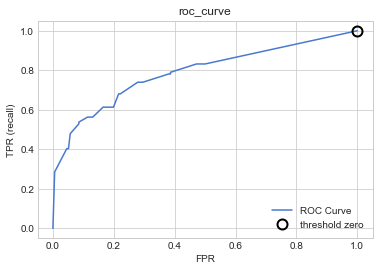

In [47]:
from sklearn.model_selection import GridSearchCV
## Search grid for optimal parameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
print(rfc)
rfc.fit(X_trainmodel, y_trainmodel.values.ravel())
#g = plot_learning_curve(rfc,"RandomForest",X_trainmodel,y_trainmodel.values.ravel(),cv=None)
result = rfc.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,rfc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

 
y_pred_result=rfc.predict(test_dataset)
plot_roc( X_val,y_val,rfc)

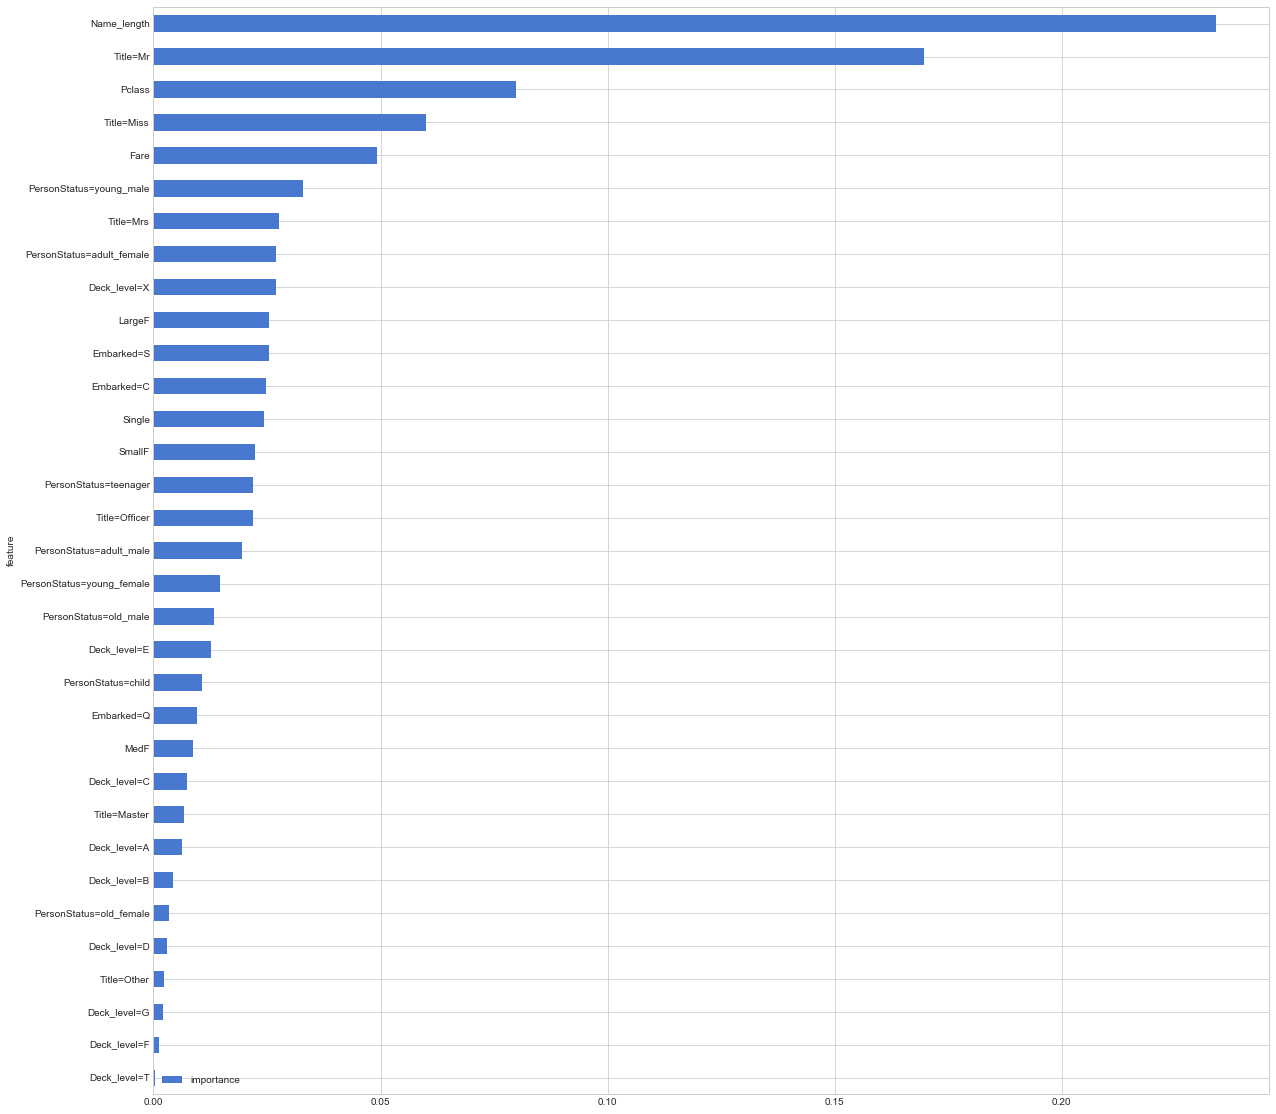

In [48]:
features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features['importance'] = rfc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [49]:
feature_labels =X_trainmodel.columns.values

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfc, threshold=0.007)

# Train the selector
sfm.fit(X_trainmodel,y_trainmodel.values.ravel())
important_features =[feature_labels[feature_list_index] for feature_list_index in sfm.get_support(indices=True)]
print(important_features)
print(len(important_features))
X_important_train = sfm.transform(X_trainmodel)
X_important_val = sfm.transform(X_val)
X_important_test =sfm.transform(test_dataset)

['Fare', 'Name_length', 'Single', 'SmallF', 'MedF', 'LargeF', 'Deck_level=A', 'Deck_level=B', 'Deck_level=C', 'Deck_level=E', 'Deck_level=X', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Pclass', 'PersonStatus=adult_female', 'PersonStatus=adult_male', 'PersonStatus=child', 'PersonStatus=old_male', 'PersonStatus=teenager', 'PersonStatus=young_female', 'PersonStatus=young_male', 'Title=Miss', 'Title=Mr', 'Title=Mrs', 'Title=Officer']
26


In [50]:
rf_param_grid = {"max_depth": [None],
              "max_features": [26],
              "min_samples_split": [2],
              "min_samples_leaf": [5],
              "bootstrap": [False],
              "n_estimators" :[200],
              "criterion": ["gini"]
              #,"class_weight":[ {0:0.68,1:0.32}]
                }
rfc =RandomForestClassifier()
grid_search = GridSearchCV(rfc,param_grid = rf_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs =-1)

grid_search.fit(X_important_train,y_trainmodel.values.ravel())

rfc_best = grid_search.best_estimator_

 #Best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


Best parameters: {'min_samples_leaf': 2, 'bootstrap': False, 'min_samples_split': 2, 'max_features': 26, 'max_depth': None, 'criterion': 'gini', 'n_estimators': 500}
Best cross-validation score: 0.80
Best estimator:
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=26, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Classification report
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       176
          1       0.72      0.60      0.65       119

avg / total       0.74      0.75      0.74       295

Confusion matrix
[[149  27]
 [ 48  71]]


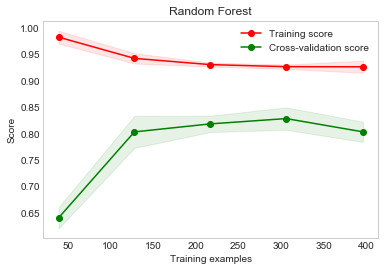

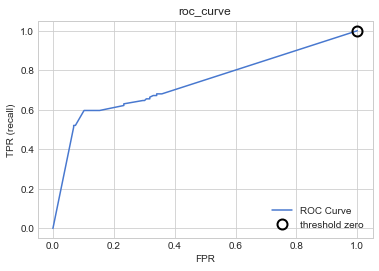

In [51]:
clf_important = rfc_best

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_trainmodel.values.ravel())
g = plot_learning_curve(clf_important,"Random Forest",X_important_train,y_trainmodel.values.ravel(),cv=None)
plot_roc(X_important_val ,y_val,clf_important)

y_pred=measure_performance(X_important_val,y_val,clf_important, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

In [ ]:
FORMAT = '%Y%m%d%H%M%S'
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="submission_rfbest"+timestamp+"_out.csv"
submission = pd.DataFrame({
        "PassengerId": test_X["PassengerId"],
        "Survived": y_pred_result
    })
submission.to_csv(filename, index=False)